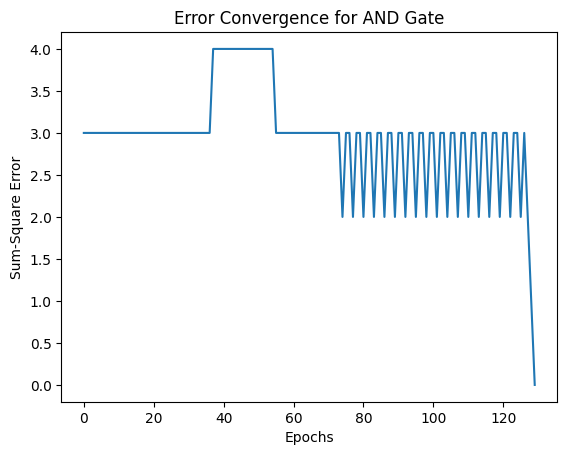

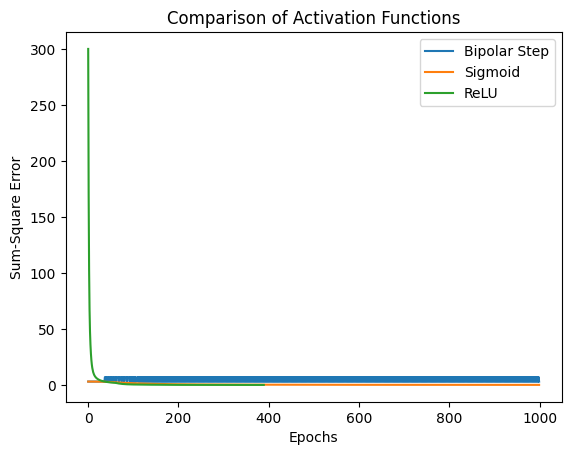

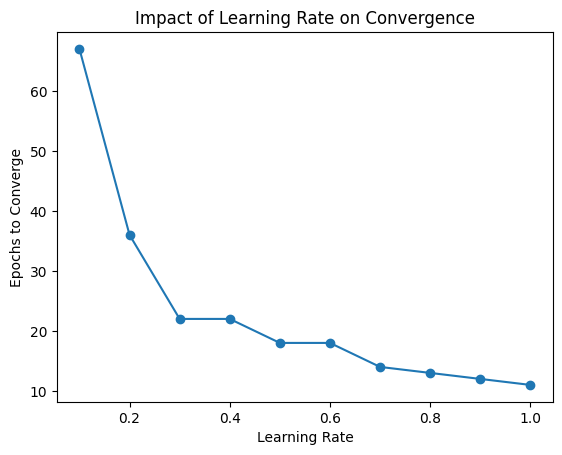

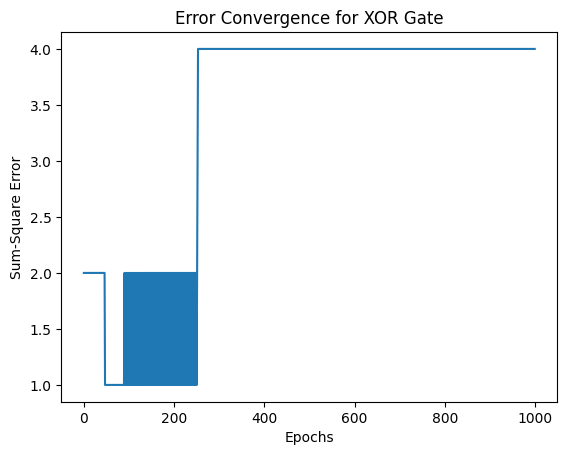

MLP AND Accuracy: 1.0
Improved MLP XOR Accuracy: 0.75
MLP Customer Classification Accuracy: 1.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    return np.tanh(x)

def relu_activation(x):
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x

def error_calculator(predicted, actual):
    return 0.5 * (actual - predicted) ** 2

def train_perceptron(X, y, activation_function, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    weights = np.array([10, 0.2, -0.75])
    epochs = 0
    errors = []
    while epochs < max_epochs:
        total_error = 0
        for i in range(len(X)):
            x_i = np.insert(X[i], 0, 1)
            net_input = summation_unit(x_i, weights)
            y_pred = activation_function(net_input)
            error = y[i] - y_pred
            weights += learning_rate * error * x_i
            total_error += error ** 2
        errors.append(total_error)
        if total_error <= error_threshold:
            break
        epochs += 1
    return weights, errors, epochs

# AND gate dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# XOR gate dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Training perceptron with Step activation for AND gate
weights, errors, epochs = train_perceptron(X_and, y_and, step_activation)

# Plotting epochs vs. error
plt.plot(range(len(errors)), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.title("Error Convergence for AND Gate")
plt.show()

# Repeat for different activations
activation_functions = {
    "Bipolar Step": bipolar_step_activation,
    "Sigmoid": sigmoid_activation,
    "ReLU": relu_activation
}

for name, func in activation_functions.items():
    _, errors, epochs = train_perceptron(X_and, y_and, func)
    plt.plot(range(len(errors)), errors, label=name)

plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.title("Comparison of Activation Functions")
plt.legend()
plt.show()

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
convergence_epochs = []

for lr in learning_rates:
    _, _, epochs = train_perceptron(X_and, y_and, step_activation, learning_rate=lr)
    convergence_epochs.append(epochs)

plt.plot(learning_rates, convergence_epochs, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Epochs to Converge")
plt.title("Impact of Learning Rate on Convergence")
plt.show()

# Perceptron for XOR gate
weights, errors, epochs = train_perceptron(X_xor, y_xor, step_activation)

plt.plot(range(len(errors)), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.title("Error Convergence for XOR Gate")
plt.show()

# MLPClassifier for AND & XOR gates
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.05, max_iter=1000)
mlp_and.fit(X_and, y_and)
print("MLP AND Accuracy:", mlp_and.score(X_and, y_and))

mlp_xor = MLPClassifier(hidden_layer_sizes=(4, 4), activation='relu', learning_rate_init=0.05, max_iter=2000)
mlp_xor.fit(X_xor, y_xor)
print("Improved MLP XOR Accuracy:", mlp_xor.score(X_xor, y_xor))

# Customer transaction classification
X_customers = np.array([
    [20, 6, 2], [16, 3, 6], [27, 6, 2], [19, 1, 2],
    [24, 4, 2], [22, 1, 5], [15, 4, 2], [18, 4, 2],
    [21, 1, 4], [16, 2, 4]
])
y_customers = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

mlp_customers = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', learning_rate_init=0.05, max_iter=1000)
mlp_customers.fit(X_customers, y_customers)
print("MLP Customer Classification Accuracy:", mlp_customers.score(X_customers, y_customers))
